# Chapter 7: Multiplicative Noise

<img src="MN_fig_01.jpg" alt="title" width="600px" />

## Motivation

Noise is ubiquitous. 

Noise: disturbance that prevents or hinders a signal to be clearly detected.

Depending on the mechanism generating noise, there are several kind of noise.

**Multiplicative noise**: noise whose strength depends on the intensity of the signal.

**Example from astronomical photography:** 
Dark current noise: thermal origin.
Read-out noise: depending on the single pixel.
Shot noise: depends on the intensity (multiplicative noise).

### Applications

- signal theory
- electronics
- astronomy, cosmology
- microscopy
- telecommunications
- motion at micro- and nanoscale
- diffusion and transport
- systems with feedback
- stochastic systems
- financial markets

## Application example: Stratonovich-to-Itô transition in noisy systems with multiplicative feedback

[Stratonovich-to-Itô transition in noisy systems with multiplicative feedback](https://www.nature.com/articles/ncomms3733)

### Malthusian (exponential) population growth

<img src="MN_fig_02.png" alt="title" width="600px" />

(a) The average population change as a function of the generation for a noisy Malthusian growth in the presence of a correlated noise with correlation time 􏰀$\tau$ = 0.04 and feedback delay 􏰂$\delta$􏰁 = 0.00, ... , 0.20 (in units of generations) (dotted lines) shows a transition between the behavior corresponding to the Stratonovich (blue dashed line) and Itô (red dashed line) integral of Eq. (S2) (􏰃 􏰁R = 0, 􏰄 􏰁$\sigma$ = 0.1). (b) The average population change after 100 generations (dots) depends on the parameter $\delta/\tau$  and shows a transition from a Stratonovich (blue dashed line) to an Itô (red dashed line) behavior as $\delta/\tau$ increases.

### Logistic population growth

<img src="MN_fig_03.png" alt="title" width="600px" />

(a) The average population size compared to the carrying capacity 􏰅 as a function of the generation for a noisy logistic growth in the presence of a correlated noise with correlation time 􏰀$\tau$ = 0.04 and feedback delay 􏰂$\delta$􏰁 = 0.00, ... , 0.20 (in units of generations) (dotted lines) shows a transition between the behavior corresponding to the Stratonovich (blue dashed line) and Itô (red dashed line) integral of Eq. (S2) (􏰃 􏰁R = 0, 􏰄 􏰁$\sigma$ = 0.1). (b) The average population change after 25 generations (dots) depends on the parameter $\delta/\tau$  and shows a transition from a Stratonovich (blue dashed line) to an Itô (red dashed line) behavior as $\delta/\tau$ increases.

### Return on investment (ROI)

<img src="MN_fig_04.png" alt="title" width="600px" />

(a) The average ROI of a risky investment -- and therefore whether it is preferable or not over a save investment (green solid line) -- depends on the underlying noise correlation time 􏰀$\tau$ = 0.04 and feedback delay 􏰂$\delta$􏰁 = 0.00, ... , 0.12 (in years) (dotted lines) as a transition occus between the behavior corresponding to the Stratonovich (blue dashed line) and Itô (red dashed line) integral of Eq. (19) (􏰃 􏰁R = 0, 􏰄 􏰁$\sigma$ = 0.1). (b) The average ROI after 10 years (dots) depends on the parameter $\delta/\tau$  and shows a transition from a Stratonovich (blue dashed line) to an Itô (red dashed line) behavior as $\delta/\tau$ increases.

### From metastable to bistable.

<img src="MN_fig_05.png" alt="title" width="600px" />

(a) Typical metastable trajectory obtained by solving Eq. (S8) using the Stratonovich integral: the state remains positive within the timescale of the simulation. (b) Typical bistable trajectory obtained solving Eq. (S8) using the Itô integral: the state repeatedly switched between positive and negative within the timescale of the simulation. (c) Probability distribution of the state – positive (+) or negative (−) – of the system after 1000 s starting with $x_0 = +2$. A transition from a Stratonovich-like behavior (blue histograms on the left) to an Itô-like behavior (red histograms on the right) for the solution of Eq. (S8) as $\delta/\tau$ increases. $\delta \equiv 40\, {\rm ms}$

## Free diffusion of a Brownian particle - Recap 

**Equation** 

Finite differences, 1D

$$
    x_{j+1} = x_j \pm \sigma \sqrt{\Delta t},    
$$


$$\langle x_j  \rangle = 0$$ 

$$\langle x_j^2 \rangle = \sigma \sqrt{j \Delta t}$$

Let's generate an ensemble of $N$ independent trajectories. (See also Chapter 6).

Let's take: $\sigma = 1$, $\Delta t = 1\ {\rm s}$, $N = 10^{4}$

We plot the distribution of the points for: 

$$
j = t_0,\ 4\, t_0,\ 16\, t_0,\ 64\, t_0,
$$

for a duration $t_0 = 50\ {\rm s}$

In [1]:
import numpy as np

# Simulation: free diffusion of a Brownian particle.

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 50  # Base value of the duration.

j_mult = np.array([1, 4, 16, 64])


Now generate ensamble trajectories.

In [2]:
x0 = 0  # Initial position [m].

x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    x_incr = sigma * np.sum(rn, axis=1)
    if j > 1:
        x_fin[:, j] = x_incr + x_fin[:, j - 1]
    else:
        x_fin[:, j] = x_incr


Plot the distribution of the final point.

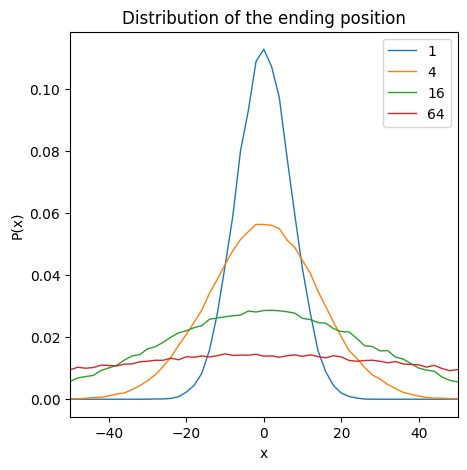

In [ ]:
from matplotlib import pyplot as plt

# Histogram of the final positions.
L = np.amax(j_mult * t0)
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([- t0, t0])
plt.show()

Let's simulate the free diffusion, but in a box.

We use reflecting boundary conditions.

In [4]:
x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        x += sigma * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x


Plot the distribution of the final point.

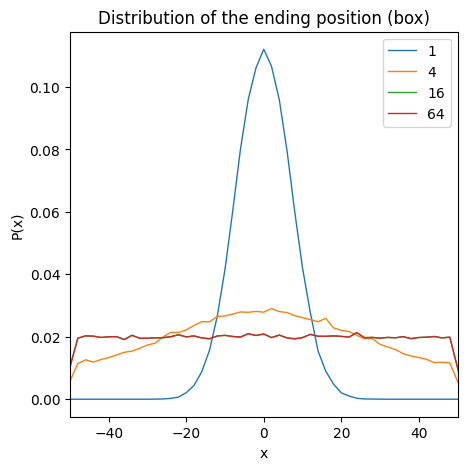

In [ ]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position (box)')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()


The histogram indicates that the particle freely diffuses.

After a long time the distrubution is flat.

There is equal probability of finding the particle in the box.

## Multiplicative noise

**Equation** 

$$
    {\rm d} x = \sigma (x)\, {\rm d} W.
$$


**Finite differences:** Is this the correct guess? 

$$
    x_{j+1} = x_j \pm \sigma(x_j) \sqrt{\Delta t},    
$$

I.e. : is it correct to generate a trajectory like above in the case the noise depends **explicitly** on the position? 

... to be checked below.

Let's assume the guess is correct.

With the guess we generate an ensemble of $N$ independent trajectories, in a **box**.

Let's take a linear dependence for $\sigma$:

$$
\sigma = \sigma_0 + \frac{\Delta \sigma}{L} x
$$ 

$\sigma_0 = 1$, $\Delta \sigma_0 = 1.8$


**Like before**: 
$\Delta t = 1\ {\rm s}$, $N = 10^{5}$

We plot the distribution of the points for: 

$$
j = t_0,\ 4\, t_0,\ 16\, t_0,\ 64\, t_0,
$$

for a duration $t_0 = 100\ {\rm s}$

In [6]:
# Simulation: free diffusion of a Brownian particle.

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 4, 16, 64])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

sigma0 = 1
dsigma = 1.8

x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))

    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 + (dsigma / L) * x  # Multiplicative noise.
        x += sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x


Plot the distribution of the final point.

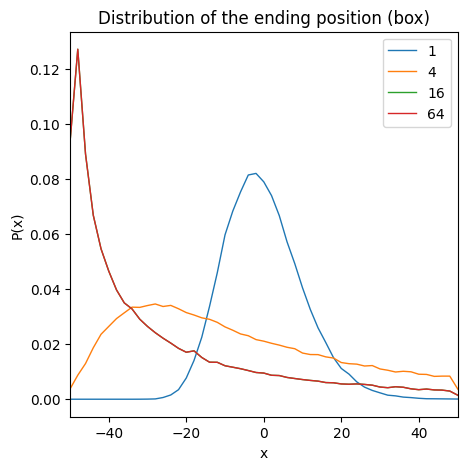

In [ ]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position (box)')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()

The plot above is physically wrong:

It shows that, without any external force, the paosition of the particle is more likely to be on the left than on the right.

Hence: our former guess:

$$
 x_{j+1} =  x_{j} \pm \sigma(x_{j}) \sqrt{\Delta t},
$$

is not suitable for physical systems.

## Stochastic integrals

$$
    x(T) 
    =  
    \int_{0}^{T} f(x_t)\, \circ_{\alpha} \, {\rm d}W_t ,
$$

is defined as a limit:

$$
    \int_{0}^{T} f(x_t)\, \circ_{\alpha} \, {\rm d}W_t \equiv \lim_{N \to \infty}\,  \sum_{n=0}^{N-1} f\left(x^{(\alpha)}_{t_n}\right)\, \Delta W_{t_n}
$$

with ${t^{(\alpha)}_n}=\frac{n+\alpha}{N}T$ and $\alpha \in [0, 1]$.

Different choices of $\alpha$ might give
- different values for the stochastic integral
- different realizations $x_{\alpha}(t)$ . 

A complete model is defined by the stochastic differential equation *and* the integration convention given by $\alpha$. 


### Integration conventions

- $\alpha=0$ : Ito 
- $\alpha=0.5$ : Stratonovich 
- $\alpha=1$ : anti-Ito 

### Noise-induced drift

$$
    \sigma(x_{t}) \circ_{\alpha} {\rm d} W_{t}
    =
    \underbrace{\alpha \sigma(x_{t}) \frac{{\rm d} \sigma(x_{t})}{{\rm d} x} {\rm d} t}_{\rm noise-induced~drift} 
    + \sigma(x_{t})\, {\rm d} W_{t},
$$

**Spurious drift**: other name for the noise-induced drift when $\alpha = 1$

$$
    v_{\rm spurious} = \sigma(x_{t}) \frac{{\rm d} \sigma(x_{t})}{{\rm d} x}.
$$

$\alpha = 1$ is suitable when dealing with multiplicative noise.

**Particle in a box with spurious drift**

$$
            x_{j+1} 
            = 
            x_{j}  
            + 
            \underbrace{\alpha \sigma(x_{j}) \frac{{\rm d} \sigma(x_{j})}{{\rm d} x}\, \Delta  t}_{\rm noise-induced~drift}   
            \pm 
            \sigma(x_{j}) \sqrt{\Delta t}.
$$


With the guess we generate an ensemble of $N$ independent trajectories, in a **box**.

Let's take a linear dependence for $\sigma$:

$$
\sigma = \sigma_0 + \frac{\Delta \sigma}{L} x
$$ 

$\sigma_0 = 1$, $\Delta \sigma_0 = 1.8$


**Like before**: 
$\Delta t = 1\ {\rm s}$, $N = 10^{5}$

We plot the distribution of the points for: 

$$
j = t_0,\ 4\, t_0,\ 16\, t_0,\ 64\, t_0,
$$

for a duration $t_0 = 100\ {\rm s}$

In [8]:
# Simulation: free diffusion of a Brownian particle.

alpha = 1

sigma = 1  # Gives the standard deviation of the single step.
dt = 1  # Time step.
N_traj = 100000 # Number of independent trajectories.

t0 = 100  # Base value of the duration.

j_mult = np.array([1, 4, 16, 64])

x0 = 0  # Initial position [m].

L = 100  # Extension of the box.
x_min = - L / 2  # Box left end.
x_max = L / 2  # Box right end.

sigma0 = 1
dsigma = 1.8
dsigma_dx = dsigma / L


x_fin = np.zeros([N_traj, np.size(j_mult)])  # Final positions.

for j in range(np.size(j_mult)):
    
    # Simulation of N_traj independent trajectories.
    
    # Set the number of steps to calculate further.
    if j > 1:
        N_steps = int(np.ceil((j_mult[j] - j_mult[j - 1]) * t0 / dt))
    else:
        N_steps = int(np.ceil(j_mult[j] * t0 / dt))

    # rn = 2 * np.random.randint(2, size=(N_traj, N_steps)) - 1
    rn = np.random.normal(0, 1, size=(N_traj, N_steps))
    
    if j > 1:
        x = x_fin[:, j - 1]
    else:
        x = np.zeros(N_traj)

    for step in range(N_steps):
        sigma_x = sigma0 + (dsigma / L) * x  # Multiplicative noise.
        dx_spurious = alpha * sigma_x * dsigma_dx * dt
        x += dx_spurious + sigma_x * rn[:, step]
        # reflecting boundary conditions
        bounce_left = np.where(x < x_min)[0]  # Hitting box left end.
        x[bounce_left] = 2 * x_min - x[bounce_left] 
        bounce_right = np.where(x > x_max)[0]  # Hitting box right end.
        x[bounce_right] = 2 * x_max - x[bounce_right]
        
    x_fin[:, j] = x


Plot the distribution of the final point.

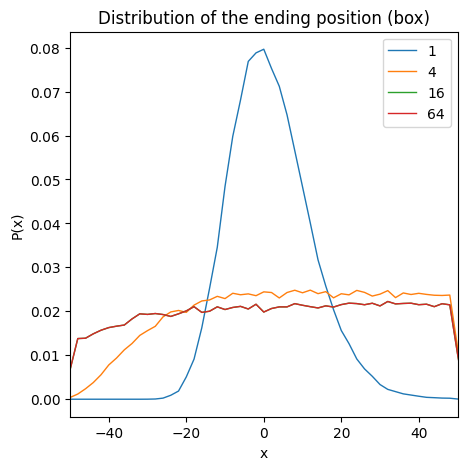

In [ ]:
# Histogram of the final positions.
bin_width = 2
bins_edges = np.arange(- L - bin_width / 2, L + bin_width / 2 + .1, bin_width)
bins = np.arange(- L, L + .1, bin_width)

p_distr = np.zeros([np.size(bins), np.size(j_mult)])  # Distributions.

for j in range(np.size(j_mult)):
    distribution = np.histogram(x_fin[:, j], bins=bins_edges)
    p_distr[:, j] = distribution[0] / np.sum(distribution[0])

plt.figure(figsize=(5, 5))
for j in range(np.size(j_mult)):
    plt.plot(bins, p_distr[:, j], '-', linewidth=1, label=str(j_mult[j]))
plt.title('Distribution of the ending position (box)')
plt.legend()
plt.xlabel('x')
plt.ylabel('P(x)')
plt.xlim([x_min, x_max])
plt.show()